In [3]:
import matplotlib.pyplot as plt
import torch
import clip
from PIL import Image
from tqdm import tqdm

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('ELCo.csv')
df

,EN,EM,Description,Composition strategy,Attribute
0,big business,👔📈,"[':necktie:', ':chart_increasing:']",Metaphorical,SIZE
1,big business,🏢🤑🤑,"[':office_building:', ':money-mouth_face:', ':...",Metaphorical,SIZE
2,big business,👨‍💻🤝,"[':man_technologist:', ':handshake:']",Metaphorical,SIZE
3,big business,🏢🧑‍🤝‍🧑🧑‍🤝‍🧑🧑‍🤝‍🧑,"[':office_building:', ':people_holding_hands:'...",Metaphorical,SIZE
4,big business,👩‍💻🤑,"[':woman_technologist:', ':money-mouth_face:']",Metaphorical,SIZE
...,...,...,...,...,...
1650,sound advice,🔊🗣️,"[':speaker_high_volume:', ':speaking_head:']",Direct,REASONABLENESS
1651,sound advice,👍🏻🎙🗣,"[':thumbs_up_light_skin_tone:', ':studio_micro...",Direct,REASONABLENESS
1652,sound advice,👦🗣️👩🤔👍,"[':boy:', ':speaking_head:', ':woman:', ':thin...",Metaphorical,REASONABLENESS
1653,sound advice,👍🧏‍♀️,"[':thumbs_up:', ':deaf_woman:']",Metaphorical,REASONABLENESS


In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from PIL import Image
from io import BytesIO

def emoji_to_image(emoji_text, output_path="emoji.png"):
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=200,200")

    # Start a headless browser
    driver = webdriver.Chrome(options=options)
    driver.get("data:text/html;charset=utf-8,<body style='font-size:100px;'>{}</body>".format(emoji_text))

    # Take a screenshot
    png = driver.get_screenshot_as_png()
    driver.quit()

    # Convert to PIL image and save
    img = Image.open(BytesIO(png))

    return img

In [7]:
tags = set()

for des in df['Description']:
    for s in eval(des):
        if len(s) > 0:
            tags.add(s)
        
tags = list(tags)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

🏢🧑‍🤝‍🧑🧑‍🤝‍🧑🧑‍🤝‍🧑 [':office_building:', ':people_holding_hands:', ':people_holding_hands:', ':people_holding_hands:']


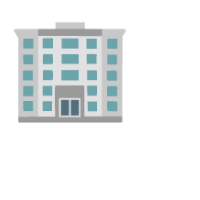

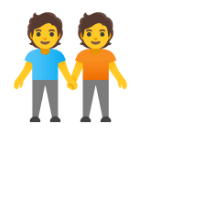

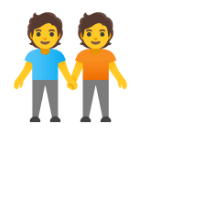

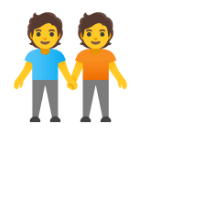

In [10]:
import grapheme

idx = 3

imgs = []

for emj in list(grapheme.graphemes(df['EM'][idx])):
    imgs.append(emoji_to_image(emj))

print(df['EM'][idx],df['Description'][idx])
for im in imgs:
    display(im)

In [12]:
print(repr(df['EM'][idx]))

'🏢🧑\u200d🤝\u200d🧑🧑\u200d🤝\u200d🧑🧑\u200d🤝\u200d🧑'


In [13]:
df['EM'][idx].split()

['🏢🧑\u200d🤝\u200d🧑🧑\u200d🤝\u200d🧑🧑\u200d🤝\u200d🧑']

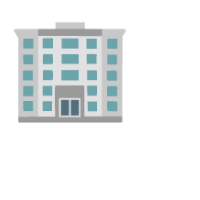

:office_building:


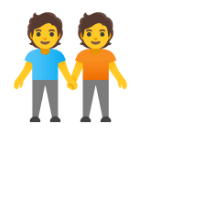

:woman_and_man_holding_hands:


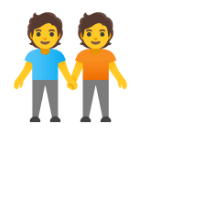

:woman_and_man_holding_hands:


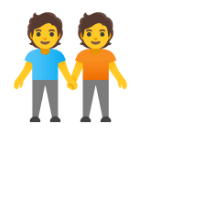

:woman_and_man_holding_hands:


In [14]:
# image -> text
for img in imgs:
    display(img)
    image = preprocess(img).unsqueeze(0).to(device)
    text = clip.tokenize(tags).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    ranking = np.argsort(-np.array(probs[0]))

    for i in range(1):
        print(tags[ranking[i]])

In [15]:
emoji_tags = set()

for idx in range(len(df['EM'])):
    for emj in list(grapheme.graphemes(df['EM'][idx])):
        emoji_tags.add(emj)
        
emoji_tags = list(emoji_tags)
emoji_tags_images = []
for idx, em in tqdm(enumerate(emoji_tags)):
    emoji_tags_images.append(emoji_to_image(em, output_path=f"emoji_images/{idx}.png"))


889it [04:10,  3.54it/s]


In [17]:
for idx, im in enumerate(emoji_tags_images):
    print(idx, im)

0 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB14A90>
1 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB14970>
2 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB164A0>
3 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB15F90>
4 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB15630>
5 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB15BA0>
6 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB17940>
7 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB16500>
8 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB15450>
9 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB16B30>
10 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB17130>
11 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x706ABBB17430>
12 <PIL.PngIma

In [24]:
idx = 120
des = eval(df['Description'][idx])
print(des)

[':sun:', ',', ':face_with_thermometer:', ':thermometer:', ':face_with_medical_mask:', ':sleeping_face:', ':cold_face:']


In [25]:
import torchvision.transforms as transforms
import torch
import numpy as np

# Define CLIP preprocessing transform 
preprocess = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])  
])

# Convert emoji images to tensors 
emoji_tensors = {}
for idx, (emoji, image) in enumerate(zip(emoji_tags, emoji_tags_images)):
    if not isinstance(image, Image.Image):
        raise TypeError(f"Expected PIL image, but got {type(image)} for {emoji}")  
    emoji_tensors[emoji] = preprocess(image.convert("RGB")).unsqueeze(0).to(device)  

# Convert dictionary values to a stacked tensor batch
emoji_images = torch.cat(list(emoji_tensors.values()), dim=0)
emoji_labels = list(emoji_tensors.keys())  

for text in des:
    print(f"Processing text: {text}")

    text_input = clip.tokenize([text]).to(device) 

    with torch.no_grad():
        image_features = model.encode_image(emoji_images)  
        text_features = model.encode_text(text_input)  

        # Compute similarity (Cosine Similarity)
        similarity = torch.nn.functional.cosine_similarity(image_features, text_features, dim=-1)
        probs = similarity.cpu().numpy()

    # Rank emojis by similarity score, Sort in descending order
    ranking = np.argsort(-probs)   

    
    # Print the best matching emoji (Top 3 for debugging)
    print(f"Best matching emoji: {emoji_labels[ranking[0]]}")  
#     print(f"Top 3 matches: {[emoji_labels[i] for i in ranking[:3]]}") 

Processing text: :sun:
Best matching emoji: 🌞
Processing text: ,
Best matching emoji: 🤣
Processing text: :face_with_thermometer:
Best matching emoji: 🌡️
Processing text: :thermometer:
Best matching emoji: 🌡️
Processing text: :face_with_medical_mask:
Best matching emoji: 😷
Processing text: :sleeping_face:
Best matching emoji: 😴
Processing text: :cold_face:
Best matching emoji: 🥶


In [23]:
for idx in range(100, 120):
    des = eval(df['Description'][idx])
    print(des)
    
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])  
    ])

    emoji_tensors = {}
    for idx, (emoji, image) in enumerate(zip(emoji_tags, emoji_tags_images)):
        if not isinstance(image, Image.Image):
            raise TypeError(f"Expected PIL image, but got {type(image)} for {emoji}")  
        emoji_tensors[emoji] = preprocess(image.convert("RGB")).unsqueeze(0).to(device)  

    emoji_images = torch.cat(list(emoji_tensors.values()), dim=0)
    emoji_labels = list(emoji_tensors.keys()) 

    for text in des:
        print(f"Processing text: {text}")

        text_input = clip.tokenize([text]).to(device)  

        with torch.no_grad():
            image_features = model.encode_image(emoji_images)  
            text_features = model.encode_text(text_input)  

            similarity = torch.nn.functional.cosine_similarity(image_features, text_features, dim=-1)
            probs = similarity.cpu().numpy()

        ranking = np.argsort(-probs)

        print(f"Best matching emoji: {emoji_labels[ranking[0]]}")

[':fire:', ':shopping_bags:', ':teddy_bear:', ':t-shirt:', ':dress:', ':pencil:', ':notebook_with_decorative_cover:']
Processing text: :fire:
Best matching emoji: 🔥
Processing text: :shopping_bags:
Best matching emoji: 🛍️
Processing text: :teddy_bear:
Best matching emoji: 🧸
Processing text: :t-shirt:
Best matching emoji: 👕
Processing text: :dress:
Best matching emoji: 👗
Processing text: :pencil:
Best matching emoji: ✏️
Processing text: :notebook_with_decorative_cover:
Best matching emoji: 📕
[':fire:', ':mobile_phone:']
Processing text: :fire:
Best matching emoji: 🔥
Processing text: :mobile_phone:
Best matching emoji: 📲
[':left_speech_bubble:', ':t-shirt:']
Processing text: :left_speech_bubble:
Best matching emoji: 💭
Processing text: :t-shirt:
Best matching emoji: 👕
[':thumbs_up:', ':teddy_bear:', ':t-shirt:']
Processing text: :thumbs_up:
Best matching emoji: 👍
Processing text: :teddy_bear:
Best matching emoji: 🧸
Processing text: :t-shirt:
Best matching emoji: 👕
[':fire:', ',', ':neutra